# Relevance Vector Machine - Classification

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from RVC import RVC

## 1) Ripley's synthetic data

In [13]:
'''# Number of samples.
N = 50

mA = [ -0.5, 0.5]
sigmaA = 0.05
mB = [0.5, -0.5]
sigmaB = 0.05

classA = np.matrix([np.random.normal(mA[0], sigmaA, N), np.random.normal(mA[1], sigmaA, N)])
classB = np.matrix([np.random.normal(mB[0], sigmaB, N), np.random.normal(mB[1], sigmaB, N)])

# Generating matrixes
X = np.concatenate((classA, classB), axis=1).T

T = np.concatenate((np.ones(N), np.zeros(N)), axis=0)'''

data = np.loadtxt(open("datasets/ripley_train.csv", "rb"))
X = data[:, :2]
T = data[:, 2]


'''# Take only 100 random points
random_indexes = random.sample(range(X.shape[0]), 100)
X = X[random_indexes, :]
T = T[random_indexes]'''

classA_indexes = np.argwhere(T == 0)
classB_indexes = np.argwhere(T == 1)

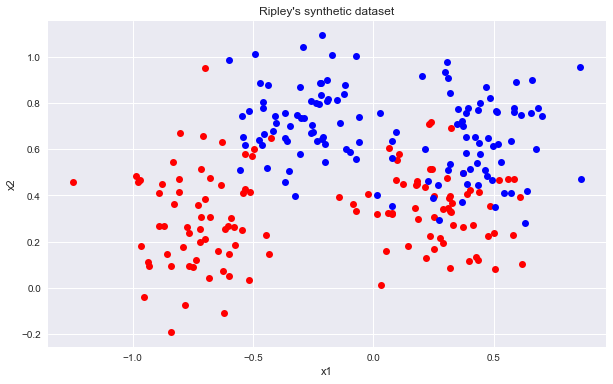

In [14]:
fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X[classA_indexes, 0], X[classA_indexes, 1], 'ro')
plt.plot(X[classB_indexes, 0], X[classB_indexes, 1], 'bo')
plt.title('Ripley\'s synthetic dataset')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [15]:
rvc = RVC(coef0=0.5)

rvc.fit(X,T)

relevance_vect = rvc.get_relevance_vectors()
print(" nb rel : ", relevance_vect.shape)
indexes_relev_vect = [i for i,x in enumerate(X) if x in relevance_vect]
pred = rvc.predict(X)
print(pred)

A Jupyter Widget


 nb rel :  (5, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1]


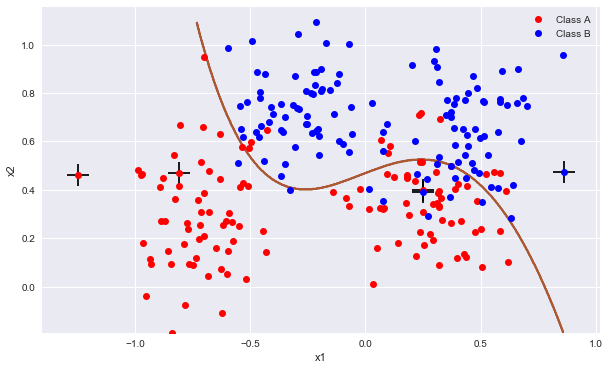

Accuracy: 0.892


In [16]:
'''classA_pred = np.argwhere(pred == 0)
classB_pred = np.argwhere(pred == 1)'''

h = 0.002  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = rvc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X[classA_indexes, 0], X[classA_indexes, 1], 'ro', label='Class A')
plt.plot(X[classB_indexes, 0], X[classB_indexes, 1], 'bo', label='Class B')
plt.scatter(relevance_vect[:,0], relevance_vect[:,1], c='black', marker='+', s=500)
#plt.plot(relevance_vect[:,0], relevance_vect[:,1], 'go')
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
#plt.title('Ripley\'s synthetic train dataset')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

fig.savefig('img/rvm_classification.pdf')

print('Accuracy:', accuracy_score(T, pred))

### Test set 

In [17]:
data = np.loadtxt(open("datasets/ripley_test.csv", "rb"))
X_test = data[:, :2]
T_test = data[:, 2]

classA_indexes_test = np.argwhere(T_test == 0)
classB_indexes_test = np.argwhere(T_test == 1)

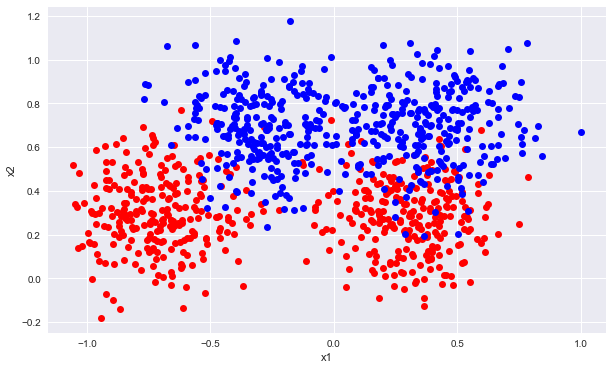

In [18]:
fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X_test[classA_indexes_test, 0], X_test[classA_indexes_test, 1], 'ro')
plt.plot(X_test[classB_indexes_test, 0], X_test[classB_indexes_test, 1], 'bo')
#plt.title('Ripley\'s synthetic dataset')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [19]:
pred_test = rvc.predict(X_test)
print(pred_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 

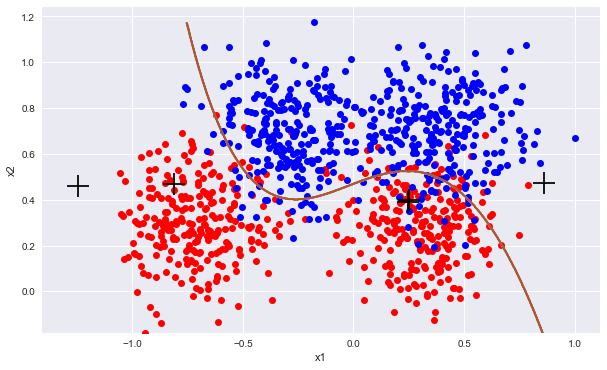

Accuracy: 0.902


In [20]:
h = 0.002  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_test[:, 0].min(), X_test[:, 0].max()
y_min, y_max = X_test[:, 1].min(), X_test[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z_test = rvc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z_test = Z_test.reshape(xx.shape)

fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X_test[classA_indexes_test, 0], X_test[classA_indexes_test, 1], 'ro', zorder=1)
plt.plot(X_test[classB_indexes_test, 0], X_test[classB_indexes_test, 1], 'bo', zorder=1)
plt.scatter(relevance_vect[:,0], relevance_vect[:,1], c='black', marker='+', s=500, zorder=2)
#plt.plot(relevance_vect[:,0], relevance_vect[:,1], 'go')
plt.contour(xx, yy, Z_test, cmap=plt.cm.Paired)
#plt.title('Ripley\'s synthetic test dataset')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

print('Accuracy:', accuracy_score(T_test, pred_test))

### Comparison with SVM

In [43]:
svc = SVC(gamma=0.5)
svc.fit(X, T)
support_vectors_idx = svc.support_
print('Number of support vectors:', len(support_vectors_idx))

Number of support vectors: 128


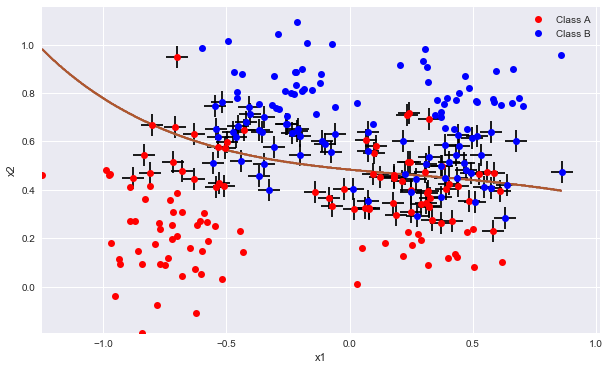

In [44]:
h = 0.002  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z= Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X[classA_indexes, 0], X[classA_indexes, 1], 'ro', label='Class A')
plt.plot(X[classB_indexes, 0], X[classB_indexes, 1], 'bo', label='Class B')
plt.scatter(X[support_vectors_idx,0], X[support_vectors_idx,1], c='black', marker='+', s=500)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

fig.savefig('img/svm_classification.pdf')

In [45]:
pred_svm = svc.predict(X_test)
print('Accuracy:', accuracy_score(T_test, pred_svm))

Accuracy: 0.897


## 2) Pima dataset

## Train

In [39]:
data = pd.read_csv('datasets/pima_train.csv', delim_whitespace=True)
data['type'] = data['type'].map({'Yes': 1, 'No': 0})
data = data.as_matrix()
X = data[:, :-1]
T = data[:, -1]

In [40]:
rvc = RVC(coef0=0.0001)

rvc.fit(X,T)

print("Number of relevance vectors : ", len(rvc.relevance_vec))

A Jupyter Widget


Number of relevance vectors :  3


In [41]:
pred = rvc.predict(X)
print('Train error:', 1 - accuracy_score(T, pred))

Train error: 0.24


## Test

In [35]:
data_test = pd.read_csv('datasets/pima_test.csv', delim_whitespace=True)
data_test['type'] = data_test['type'].map({'Yes': 1, 'No': 0})
data_test = data_test.as_matrix()
X_test = data_test[:, :-1]
T_test = data_test[:, -1]

In [53]:
pred_test = rvc.predict(X_test)
print('Test error:', 1 - accuracy_score(T_test, pred_test))

Test error: 0.20783132530120485


## SVM

In [67]:
svc = SVC(gamma=0.0001)
svc.fit(X, T)
support_vectors_idx = svc.support_
print('Number of support vectors:', len(support_vectors_idx))

Number of support vectors: 116


In [54]:
pred_svm = svc.predict(X_test)
print('SVM error :', 1 - accuracy_score(T_test, pred_svm))

SVM error : 0.21084337349397586


## 2) Banana dataset

## RVM

In [246]:
runs = 5

vectors = 0.0
train_error = 0.0
test_error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/banana_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/banana_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/banana_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/banana_test_labels_' + str(i) + '.asc')

    T[T == -1] = 0
    T_test[T_test == -1] = 0
    
    rvc = RVC()

    rvc.fit(X,T)
    
    vectors += len(rvc.relevance_vec)
    
    pred = rvc.predict(X)
    train_error += 1 - accuracy_score(T, pred)
    
    pred_test = rvc.predict(X_test)
    test_error += 1 - accuracy_score(T_test, pred_test)



print("relevance vectors: ", vectors / runs)

print("train error: ", train_error / runs)

print("test error: ", test_error / runs)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

relevance vectors:  11.2
train error:  0.0765
test error:  0.112897959184


# SVM

In [227]:
runs = 10
vectors = 0
error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/banana_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/banana_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/banana_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/banana_test_labels_' + str(i) + '.asc')

    svc = SVC(gamma=1)
    svc.fit(X, T)
    support_vectors_idx = svc.support_
    
    vectors += len(support_vectors_idx)

    pred_svm = svc.predict(X_test)
    
    error += 1 - accuracy_score(T_test, pred_svm)
    

print('Number of support vectors:', vectors / runs)

print('SVM error :', error / runs)

Number of support vectors: 150.5
SVM error : 0.106918367347


# 2) Breast Cancer

## RVM

In [230]:
runs = 5

vectors = 0.0
train_error = 0.0
test_error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/breast-cancer_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/breast-cancer_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/breast-cancer_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/breast-cancer_test_labels_' + str(i) + '.asc')

    T[T == -1] = 0
    T_test[T_test == -1] = 0
    
    rvc = RVC()

    rvc.fit(X,T)
    
    vectors += len(rvc.relevance_vec)
    
    pred = rvc.predict(X)
    train_error += 1 - accuracy_score(T, pred)
    
    pred_test = rvc.predict(X_test)
    test_error += 1 - accuracy_score(T_test, pred_test)



print("relevance vectors: ", vectors / runs)

print("train error: ", train_error / runs)

print("test error: ", test_error / runs)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

relevance vectors:  11.2
train error:  0.185
test error:  0.288311688312


## SVM

In [235]:
runs = 5
vectors = 0
error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/breast-cancer_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/breast-cancer_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/breast-cancer_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/breast-cancer_test_labels_' + str(i) + '.asc')

    svc = SVC(gamma=0.1)
    svc.fit(X, T)
    support_vectors_idx = svc.support_
    
    vectors += len(support_vectors_idx)

    pred_svm = svc.predict(X_test)
    
    error += 1 - accuracy_score(T_test, pred_svm)
    

print('Number of support vectors:', vectors / runs)

print('SVM error :', error / runs)

Number of support vectors: 128.2
SVM error : 0.275324675325


# 3) Titanic

## RVM

In [237]:
runs = 5

vectors = 0.0
train_error = 0.0
test_error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/titanic_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/titanic_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/titanic_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/titanic_test_labels_' + str(i) + '.asc')

    T[T == -1] = 0
    T_test[T_test == -1] = 0
    
    rvc = RVC()

    rvc.fit(X,T)
    
    vectors += len(rvc.relevance_vec)
    
    pred = rvc.predict(X)
    train_error += 1 - accuracy_score(T, pred)
    
    pred_test = rvc.predict(X_test)
    test_error += 1 - accuracy_score(T_test, pred_test)



print("relevance vectors: ", vectors / runs)

print("train error: ", train_error / runs)

print("test error: ", test_error / runs)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

relevance vectors:  59.0
train error:  0.208
test error:  0.234422233057


## SVM

In [238]:
runs = 5
vectors = 0
error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/titanic_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/titanic_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/titanic_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/titanic_test_labels_' + str(i) + '.asc')

    svc = SVC(gamma=0.1)
    svc.fit(X, T)
    support_vectors_idx = svc.support_
    
    vectors += len(support_vectors_idx)

    pred_svm = svc.predict(X_test)
    
    error += 1 - accuracy_score(T_test, pred_svm)
    

print('Number of support vectors:', vectors / runs)

print('SVM error :', error / runs)

Number of support vectors: 71.0
SVM error : 0.22964407606


# 4) Waveform

## RVM

In [240]:
runs = 5

vectors = 0.0
train_error = 0.0
test_error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/waveform_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/waveform_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/waveform_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/waveform_test_labels_' + str(i) + '.asc')

    T[T == -1] = 0
    T_test[T_test == -1] = 0
    
    rvc = RVC()

    rvc.fit(X,T)
    
    vectors += len(rvc.relevance_vec)
    
    pred = rvc.predict(X)
    train_error += 1 - accuracy_score(T, pred)
    
    pred_test = rvc.predict(X_test)
    test_error += 1 - accuracy_score(T_test, pred_test)



print("relevance vectors: ", vectors / runs)

print("train error: ", train_error / runs)

print("test error: ", test_error / runs)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

relevance vectors:  20.0
train error:  0.032
test error:  0.111347826087


## SVM

In [242]:
runs = 5
vectors = 0
error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/waveform_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/waveform_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/waveform_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/waveform_test_labels_' + str(i) + '.asc')

    svc = SVC(gamma=0.01)
    svc.fit(X, T)
    support_vectors_idx = svc.support_
    
    vectors += len(support_vectors_idx)

    pred_svm = svc.predict(X_test)
    
    error += 1 - accuracy_score(T_test, pred_svm)
    

print('Number of support vectors:', vectors / runs)

print('SVM error :', error / runs)

Number of support vectors: 167.4
SVM error : 0.109913043478


# 5) German

## RVM

In [243]:
runs = 5

vectors = 0.0
train_error = 0.0
test_error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/german_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/german_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/german_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/german_test_labels_' + str(i) + '.asc')

    T[T == -1] = 0
    T_test[T_test == -1] = 0
    
    rvc = RVC()

    rvc.fit(X,T)
    
    vectors += len(rvc.relevance_vec)
    
    pred = rvc.predict(X)
    train_error += 1 - accuracy_score(T, pred)
    
    pred_test = rvc.predict(X_test)
    test_error += 1 - accuracy_score(T_test, pred_test)



print("relevance vectors: ", vectors / runs)

print("train error: ", train_error / runs)

print("test error: ", test_error / runs)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

relevance vectors:  46.8
train error:  0.163714285714
test error:  0.236


## SVM

In [244]:
runs = 5
vectors = 0
error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/german_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/german_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/german_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/german_test_labels_' + str(i) + '.asc')

    svc = SVC(gamma=0.01)
    svc.fit(X, T)
    support_vectors_idx = svc.support_
    
    vectors += len(support_vectors_idx)

    pred_svm = svc.predict(X_test)
    
    error += 1 - accuracy_score(T_test, pred_svm)
    

print('Number of support vectors:', vectors / runs)

print('SVM error :', error / runs)

Number of support vectors: 425.2
SVM error : 0.237333333333


# 6) Flare Solar

## Train

In [247]:
runs = 5

vectors = 0.0
train_error = 0.0
test_error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/flare-solar_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/flare-solar_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/flare-solar_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/flare-solar_test_labels_' + str(i) + '.asc')

    T[T == -1] = 0
    T_test[T_test == -1] = 0
    
    rvc = RVC()

    rvc.fit(X,T)
    
    vectors += len(rvc.relevance_vec)
    
    pred = rvc.predict(X)
    train_error += 1 - accuracy_score(T, pred)
    
    pred_test = rvc.predict(X_test)
    test_error += 1 - accuracy_score(T_test, pred_test)



print("relevance vectors: ", vectors / runs)

print("train error: ", train_error / runs)

print("test error: ", test_error / runs)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

relevance vectors:  253.4
train error:  0.332432432432
test error:  0.3295


## SVM

In [255]:
runs = 5
vectors = 0
error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/flare-solar_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/flare-solar_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/flare-solar_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/flare-solar_test_labels_' + str(i) + '.asc')

    svc = SVC(gamma=1)
    svc.fit(X, T)
    support_vectors_idx = svc.support_
    
    vectors += len(support_vectors_idx)

    pred_svm = svc.predict(X_test)
    
    error += 1 - accuracy_score(T_test, pred_svm)
    

print('Number of support vectors:', vectors / runs)

print('SVM error :', error / runs)

Number of support vectors: 482.0
SVM error : 0.3525


## Heart

In [256]:
runs = 5

vectors = 0.0
train_error = 0.0
test_error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/heart_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/heart_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/heart_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/heart_test_labels_' + str(i) + '.asc')

    T[T == -1] = 0
    T_test[T_test == -1] = 0
    
    rvc = RVC()

    rvc.fit(X,T)
    
    vectors += len(rvc.relevance_vec)
    
    pred = rvc.predict(X)
    train_error += 1 - accuracy_score(T, pred)
    
    pred_test = rvc.predict(X_test)
    test_error += 1 - accuracy_score(T_test, pred_test)



print("relevance vectors: ", vectors / runs)

print("train error: ", train_error / runs)

print("test error: ", test_error / runs)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

relevance vectors:  15.4
train error:  0.0741176470588
test error:  0.206


## svm

In [260]:
runs = 5
vectors = 0
error = 0.0

for i in range(1, runs + 1) :
    X = np.loadtxt('datasets/heart_train_data_' + str(i) + '.asc')
    T = np.loadtxt('datasets/heart_train_labels_' + str(i) + '.asc')
    
    X_test = np.loadtxt('datasets/heart_test_data_' + str(i) + '.asc')
    T_test = np.loadtxt('datasets/heart_test_labels_' + str(i) + '.asc')

    svc = SVC(gamma=0.01)
    svc.fit(X, T)
    support_vectors_idx = svc.support_
    
    vectors += len(support_vectors_idx)

    pred_svm = svc.predict(X_test)
    
    error += 1 - accuracy_score(T_test, pred_svm)
    

print('Number of support vectors:', vectors / runs)

print('SVM error :', error / runs)

Number of support vectors: 97.0
SVM error : 0.168
